In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plts
import colorsys
from matplotlib.patches import Rectangle
import matplotlib.transforms
from PIL import Image
from scipy.optimize import curve_fit

import csv
from csv import writer

import os
import statistics



In [3]:
data = pd.read_csv("dog_breeds.csv")
data.head()

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
0,Golden Retriever,10,12,24.0,24.0,75.0,65.0,23.0,23.0,65.0,...,4,2,2,1,5,4,3,5,3,1
1,Dachshund,12,16,9.0,9.0,32.0,32.0,8.0,8.0,16.0,...,2,2,2,2,4,4,4,4,3,5
2,Labrador Retriever,10,12,24.5,24.5,80.0,70.0,22.5,22.5,65.0,...,4,2,2,1,5,5,3,5,5,3
3,Great Dane,7,10,32.0,32.0,175.0,140.0,30.0,30.0,140.0,...,3,1,4,1,3,4,5,3,4,3
4,Boxer,10,12,25.0,25.0,80.0,65.0,23.0,23.0,65.0,...,2,2,3,1,4,4,4,4,4,3


In [28]:
Name = 'Name'
min_life_expectancy = 'min_life_expectancy'
max_life_expectancy = 'max_life_expectancy'
max_height_male = 'max_height_male'
max_height_female = 'max_height_female'
max_weight_male = 'max_weight_male'
max_weight_female = 'max_weight_female'
min_height_male = 'min_height_male'
min_height_female = 'min_height_female'
min_weight_male = 'min_weight_male'
min_weight_female = 'min_weight_female'
good_with_children = 'good_with_children'
good_with_other_dogs = 'good_with_other_dogs'
shedding = 'shedding'
grooming = 'grooming'
drooling = 'drooling'
coat_length = 'coat_length'
good_with_strangers = 'good_with_strangers'
playfulness = 'playfulness'
protectiveness = 'protectiveness'
trainability = 'trainability'
energy = 'energy'
barking = 'barking'

<BarContainer object of 97 artists>

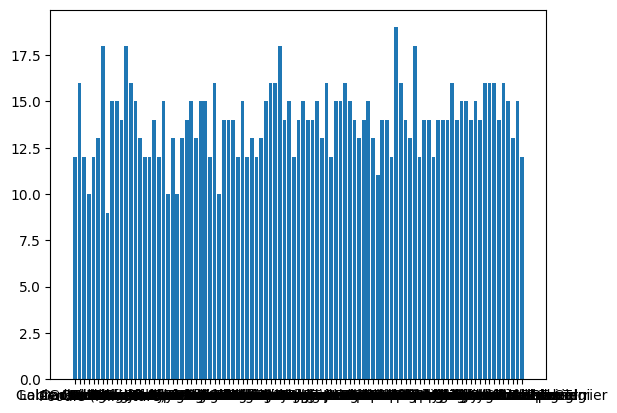

In [29]:
plt.bar(data[Name], data[max_life_expectancy])

<BarContainer object of 97 artists>

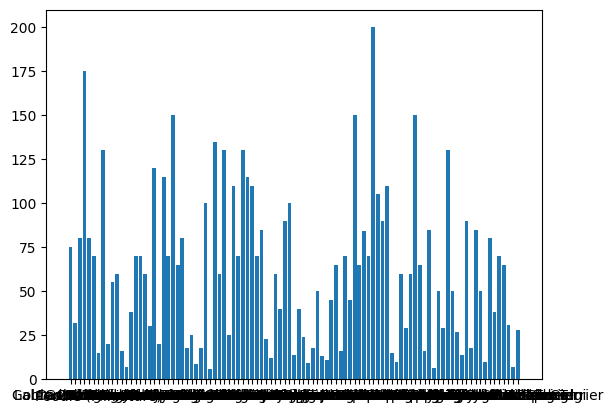

In [71]:
plt.bar(data[Name], data[max_weight_male])

(array([22., 12.,  5.,  7., 20.,  5.,  7.,  3.,  6.,  5.,  0.,  3.,  0.,
         1.,  1.]),
 array([  6.        ,  18.93333333,  31.86666667,  44.8       ,
         57.73333333,  70.66666667,  83.6       ,  96.53333333,
        109.46666667, 122.4       , 135.33333333, 148.26666667,
        161.2       , 174.13333333, 187.06666667, 200.        ]),
 <BarContainer object of 15 artists>)

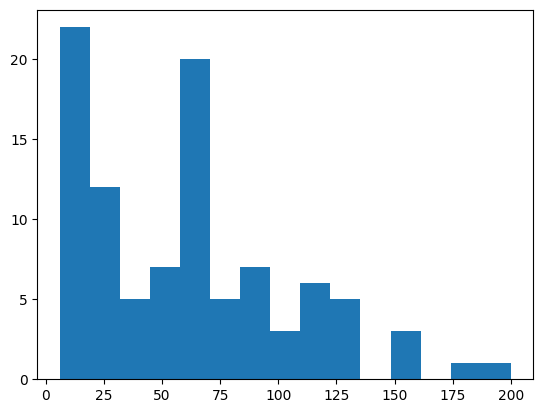

In [80]:
plt.hist(data[max_weight_male], bins=15)

In [62]:
low_life_idx = np.where(data[max_life_expectancy] <= 10)
low_life_idx[0]
for idx in low_life_idx[0]:
    print(data.iloc[idx][max_weight_female])

140.0
120.0
95.0
120.0
100.0


In [82]:
# num_vars = data.select_dtypes(include=['int64'])
display(data.describe())

,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,min_weight_female,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,11.360825,14.000000,20.561856,20.427835,60.890722,54.292784,18.164948,18.061856,46.024742,40.076289,...,2.587629,2.154639,1.618557,1.020619,3.402062,3.608247,3.659794,3.804124,3.680412,2.958763
std,1.653189,1.870829,6.949692,6.836251,43.281424,36.473518,6.747963,6.656473,34.927431,28.510622,...,0.921418,1.034209,0.983651,0.203069,1.114860,0.984851,1.162671,0.975098,0.907680,1.257623
min,7.000000,9.000000,7.000000,7.000000,6.000000,6.000000,5.000000,5.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,13.000000,15.000000,15.000000,23.000000,22.000000,12.000000,12.000000,15.000000,15.000000,...,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,12.000000,14.000000,22.000000,22.000000,60.000000,55.000000,19.000000,19.000000,40.000000,35.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,12.000000,15.000000,27.000000,27.000000,85.000000,71.000000,24.000000,24.000000,65.000000,57.000000,...,3.000000,3.000000,2.000000,1.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
max,15.000000,19.000000,33.000000,32.000000,200.000000,200.000000,30.000000,30.000000,150.000000,150.000000,...,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
